# Project 4 - Semi-Supervised Learning & Model Evaluation
Γεώργιος Δάλλας
ΑΕΜ: 217
# Part A

# 1.
On this step, statistics for all variables of the water_potability dataset are printed using df.describe(). Moreover, a bar plot for Potability values is created and histograms for all other variables. <br/>
Most features appear to be normally distrubted. Residual sugar, volatile acidity and alcohol dont look to be spread near the mean value (no normal distribution). That means that those variables will probably provide importance in determinating the quality of a wine. A bar plot for the Type feature is created and it shows that over 3500 out of 6487 samples have their type missing, as well as an imbalance between white and red wines (white wines are more than double of red).

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

In [192]:
df = pd.read_csv('wine-missing.csv')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


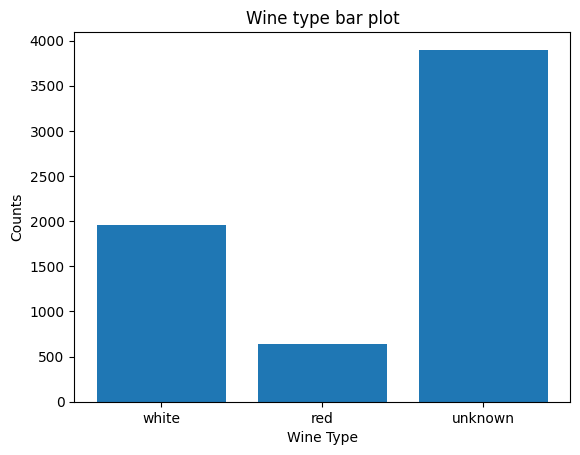

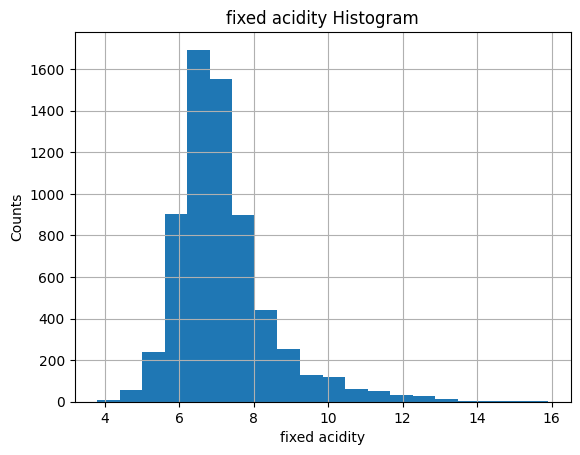

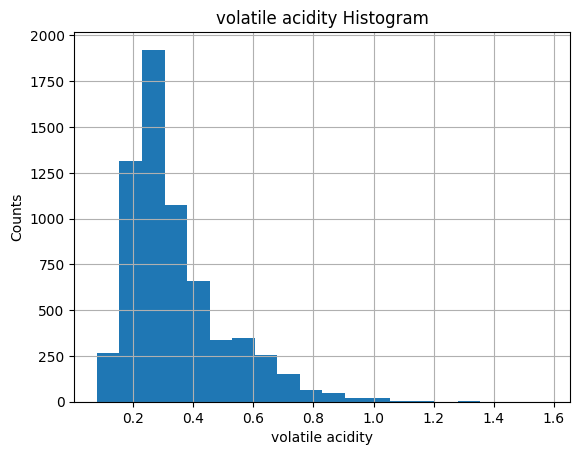

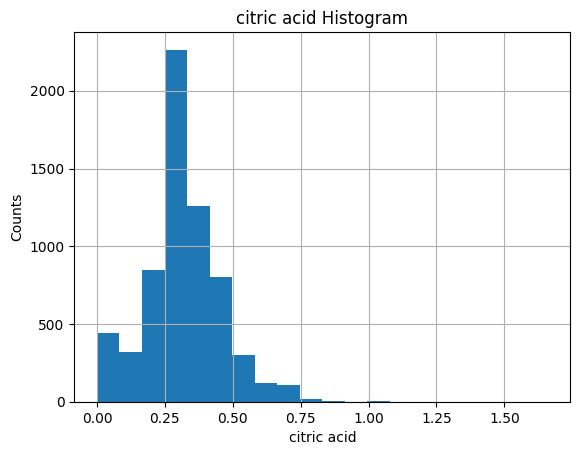

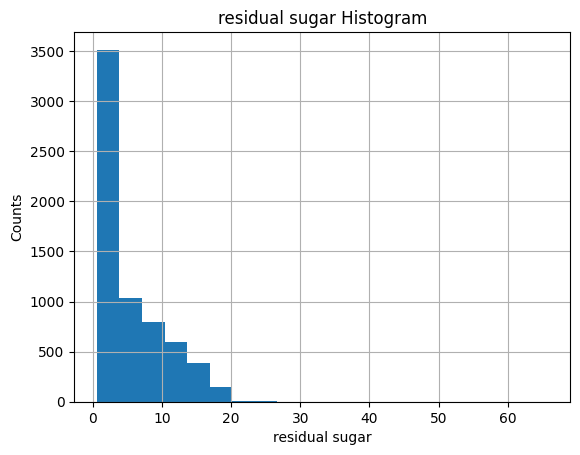

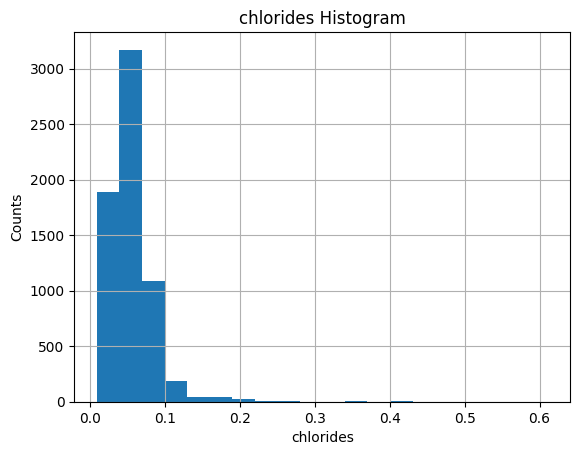

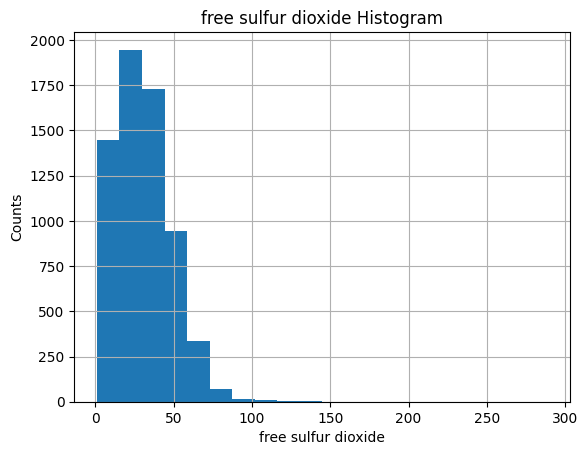

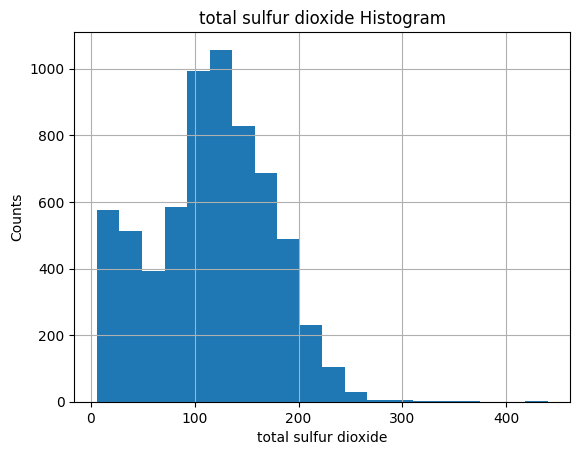

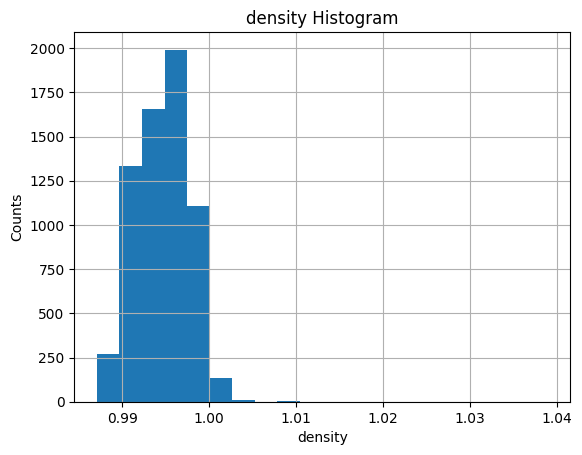

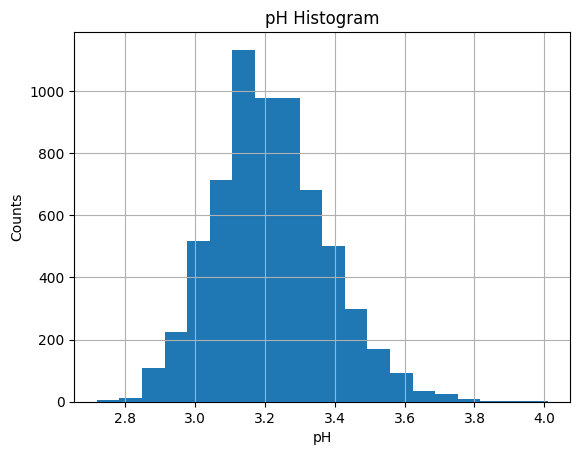

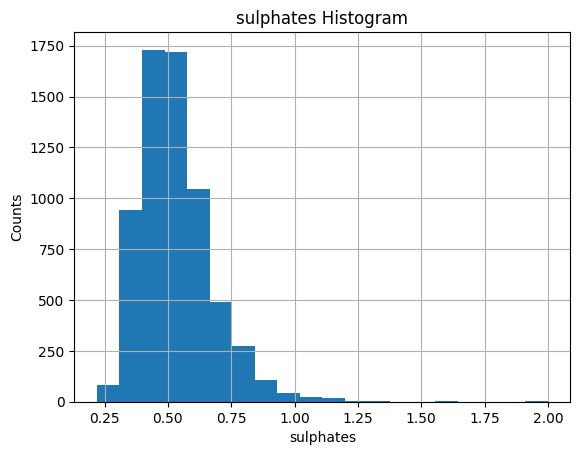

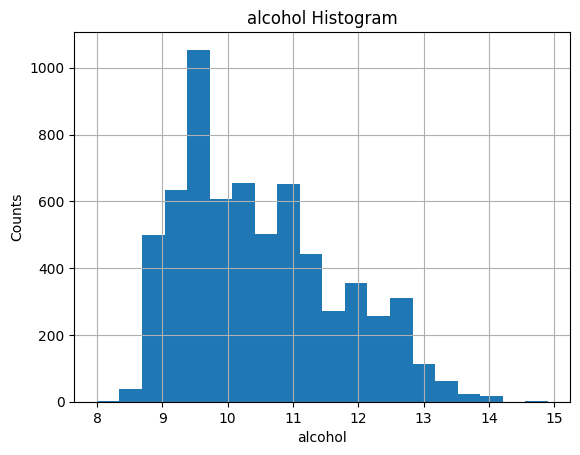

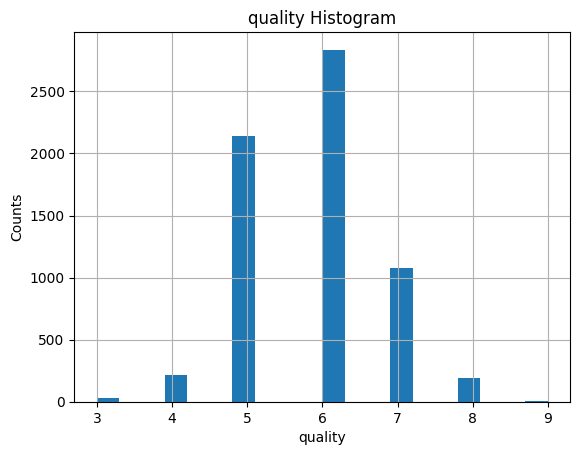

In [193]:
white,red,unknown= 0,0,0
for i in df['type']:

    if i == 'white':
        white +=1
    elif i == 'red':
        red +=1
    else:
        unknown +=1

plt.bar(['white','red','unknown'],[white,red,unknown])
plt.title('Wine type bar plot')
plt.xlabel('Wine Type')
plt.ylabel('Counts')
plt.show()
df['fixed acidity'].hist(bins=20)
plt.title('fixed acidity Histogram')
plt.xlabel('fixed acidity')
plt.ylabel('Counts')
plt.show()
df['volatile acidity'].hist(bins=20)
plt.title('volatile acidity Histogram')
plt.xlabel('volatile acidity')
plt.ylabel('Counts')
plt.show()
df['citric acid'].hist(bins=20)
plt.title('citric acid Histogram')
plt.xlabel('citric acid')
plt.ylabel('Counts')
plt.show()
df['residual sugar'].hist(bins=20)
plt.title('residual sugar Histogram')
plt.xlabel('residual sugar')
plt.ylabel('Counts')
plt.show()
df['chlorides'].hist(bins=20)
plt.title('chlorides Histogram')
plt.xlabel('chlorides')
plt.ylabel('Counts')
plt.show()
df['free sulfur dioxide'].hist(bins=20)
plt.title('free sulfur dioxide Histogram')
plt.xlabel('free sulfur dioxide')
plt.ylabel('Counts')
plt.show()
df['total sulfur dioxide'].hist(bins=20)
plt.title('total sulfur dioxide Histogram')
plt.xlabel('total sulfur dioxide')
plt.ylabel('Counts')
plt.show()
df['density'].hist(bins=20)
plt.title('density Histogram')
plt.xlabel('density')
plt.ylabel('Counts')
plt.show()
df['pH'].hist(bins=20)
plt.title('pH Histogram')
plt.xlabel('pH')
plt.ylabel('Counts')
plt.show()
df['sulphates'].hist(bins=20)
plt.title('sulphates Histogram')
plt.xlabel('sulphates')
plt.ylabel('Counts')
plt.show()
df['alcohol'].hist(bins=20)
plt.title('alcohol Histogram')
plt.xlabel('alcohol')
plt.ylabel('Counts')
plt.show()
df['quality'].hist(bins=20)
plt.title('quality Histogram')
plt.xlabel('quality')
plt.ylabel('Counts')
plt.show()



# 2.
Here, the 'white' values of the type feature are set to 0, 'red' are set to 1 and 'unknown' are set to 2. Furthermore, a numpy array x is set to contain all features except type and y to contain the corresponding type.

In [194]:
for i in df.index:
    if df.loc[i,'type'] == 'white':
        df.loc[i,'type'] = 0
    elif df.loc[i,'type'] == 'red':
        df.loc[i,'type'] = 1
    else:
        df.loc[i,'type'] = 2
input_df = df.drop(columns=['type'])
targets_df = df['type']
x = input_df.to_numpy()
y = targets_df.to_numpy().astype(int)



# 3.
In this step, a mask is created for type values that are not 2 (unknown).
This is used to create 2 datasets, 1 with x and y (type) known and one with x and y where y(type) is unknown (=2).

In [195]:
maskknown = (y[:]!=2)
x_known = x[maskknown]
y_known = y[maskknown]
x_unknown = x[~maskknown]
y_unknown = y[~maskknown]



# 4.
The train_test_split function from sklearn is used to create a 70%/30% train/test dataset from known samples (where y= 1 or 0). In addition, stratify=y_known is used so train and test sets have the same percentage of red and white wines. For example if 70% of known y values are white and 30% are red, both in train and in test sets, 70% will be white and 30% will be red wines.

In [196]:
seed = 42
test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x_known, y_known, test_size=test_size, random_state=seed, stratify=y_known)

# 5.
A random forest classifier is trained on train set and test both on train and test sets. Then accuracy, f1-score, precision and recall metrics are calculated and printed.
F1 score (harmonic mean of precision an recall) is much more indicative than accuracy since there is an imbalance between white and red wines.

In [197]:
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train, y_train)

y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)


print('The accuracy of the model in train data is:',accuracy_train*100,'%')
print('The accuracy of the model in test data is:',accuracy_test*100,'%')

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)


print('The f1-score of the model in train data is:',f1_train*100,'%')
print('The f1-score of the model in test data is:',f1_test*100,'%')

precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)


print('The precision of the model in train data is:',precision_train*100,'%')
print('The precision of the model in test data is:',precision_test*100,'%')

recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)

print('The recall of the model in train data is:',recall_train*100,'%')
print('The recall of the model in test data is:',recall_test*100,'%')


The accuracy of the model in train data is: 99.9450247388675 %
The accuracy of the model in test data is: 99.87179487179488 %
The f1-score of the model in train data is: 99.88851727982163 %
The f1-score of the model in test data is: 99.74025974025975 %
The precision of the model in train data is: 99.77728285077951 %
The precision of the model in test data is: 99.48186528497409 %
The recall of the model in train data is: 100.0 %
The recall of the model in test data is: 100.0 %


# 6.
Here the step 5 is repeated but the RandomForestClassifier now has the class_weight attribute set to ='balanced'. If set to none (default), the weight of each class in y is set to 1. When the attribute is set to balance, each class of y (y_train) gets a weight inversely propotinal to class frequency. In this way, classes with less samples have bigger weights, so they can contribute equally to frequent classes in training. 


In [198]:
clf = RandomForestClassifier(random_state=42,class_weight='balanced')
clf.fit(x_train, y_train)

y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)


print('The accuracy of the model in train data is:',accuracy_train*100,'%')
print('The accuracy of the model in test data is:',accuracy_test*100,'%')

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)


print('The f1-score of the model in train data is:',f1_train*100,'%')
print('The f1-score of the model in test data is:',f1_test*100,'%')

precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)


print('The precision of the model in train data is:',precision_train*100,'%')
print('The precision of the model in test data is:',precision_test*100,'%')

recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)

print('The recall of the model in train data is:',recall_train*100,'%')
print('The recall of the model in test data is:',recall_test*100,'%')


The accuracy of the model in train data is: 99.9450247388675 %
The accuracy of the model in test data is: 99.61538461538461 %
The f1-score of the model in train data is: 99.88851727982163 %
The f1-score of the model in test data is: 99.21259842519686 %
The precision of the model in train data is: 99.77728285077951 %
The precision of the model in test data is: 100.0 %
The recall of the model in train data is: 100.0 %
The recall of the model in test data is: 98.4375 %


# 7.
The classifier from step 6 is used to predict the output (y_unknown) of x_unknown.

In [199]:
y_unknown_proba=clf.predict_proba(x_unknown)


# 8.
If y_unknown_proba is greater than 0.65 for the second class, then y_unknown_pred is appended with a red label. If the probability is lower than 0.35, so the second class being true is unlikely then the list is appended with a white label. In all other cases, the list is appended with an unknown label since the prediction is not clear enough.

In [200]:
y_unknown_pred =  []
for i in y_unknown_proba[:,1]:
    if i > 0.65:
        y_unknown_pred.append('red')
    elif i < 0.35:
        y_unknown_pred.append('white')
    else:
        y_unknown_pred.append("unknown")

# 9.
After the precictions of the step above, the x_known, yknown set can be combined with the x_uknown, y_uknown set.
In that way, more labeled samples can be used in training. Afterwards, the random forest from step 6 is trained and tested again on the new set created.

In [201]:
y_unknown2 = []
for i in y_unknown_pred:
    if i=='white':
        y_unknown2.append(0)
    elif i=='red':
        y_unknown2.append(1)
    else:
        y_unknown2.append(2)
y_unknown2 = np.array(y_unknown2, dtype=int)

x_new = np.concatenate([x_known, x_unknown], axis=0)
y_new = np.concatenate([y_known, y_unknown2], axis=0)

seed = 42
test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=test_size, random_state=seed, stratify=y_new)
clf = RandomForestClassifier(random_state=42,class_weight='balanced')
clf.fit(x_train, y_train)

y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)


print('The accuracy of the model in train data is:',accuracy_train*100,'%')
print('The accuracy of the model in test data is:',accuracy_test*100,'%')

The accuracy of the model in train data is: 99.97800747745767 %
The accuracy of the model in test data is: 99.07692307692308 %


# 10.
Here steps 6-9 are repeated until no more unknown labels exist.

In [202]:
x = x_new
y = y_new
maskknown = (y[:]!=2)
x_known = x[maskknown]
y_known = y[maskknown]
x_unknown = x[~maskknown]
y_unknown = y[~maskknown]
seed = 42
test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x_known, y_known, test_size=test_size, random_state=seed, stratify=y_known)
while len(y_unknown)>0:
    print('Unknown samples exist')
    clf = RandomForestClassifier(random_state=42,class_weight='balanced')
    clf.fit(x_train, y_train)

    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)


    print('The accuracy of the model in train data is:',accuracy_train*100,'%')
    print('The accuracy of the model in test data is:',accuracy_test*100,'%')

    f1_train = f1_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)


    print('The f1-score of the model in train data is:',f1_train*100,'%')
    print('The f1-score of the model in test data is:',f1_test*100,'%')

    precision_train = precision_score(y_train, y_pred_train)
    precision_test = precision_score(y_test, y_pred_test)


    print('The precision of the model in train data is:',precision_train*100,'%')
    print('The precision of the model in test data is:',precision_test*100,'%')

    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)

    print('The recall of the model in train data is:',recall_train*100,'%')
    print('The recall of the model in test data is:',recall_test*100,'%')
    y_unknown_proba=clf.predict_proba(x_unknown)
 
    y_unknown_pred =  []
    for i in y_unknown_proba[:,1]:
        if i > 0.65:
            y_unknown_pred.append('red')
        elif i < 0.35:
            y_unknown_pred.append('white')
        else:
            y_unknown_pred.append("unknown")


    red_white_exist = False
    for label in y_unknown_pred:
        if label in ['red', 'white']:
            red_white_exist = True
            break

    if red_white_exist == False:
        print("Cant continue, sample filling confidence is too low")
        break




    y_unknown2 = []
    for i in y_unknown_pred:
        if i=='white':
            y_unknown2.append(0)
        elif i=='red':
            y_unknown2.append(1)
        else:
            y_unknown2.append(2)
    y_unknown2 = np.array(y_unknown2, dtype=int)

    x_new = np.concatenate([x_known, x_unknown], axis=0)
    y_new = np.concatenate([y_known, y_unknown2], axis=0)

    seed = 42
    test_size = 0.3
    x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=test_size, random_state=seed, stratify=y_new)
    clf = RandomForestClassifier(random_state=42,class_weight='balanced')
    clf.fit(x_train, y_train)

    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)


    print('The accuracy of the model in train data is:',accuracy_train*100,'%')
    print('The accuracy of the model in test data is:',accuracy_test*100,'%')
    x = x_new
    y = y_new
    maskknown = (y[:]!=2)
    x_known = x[maskknown]
    y_known = y[maskknown]
    x_unknown = x[~maskknown]
    y_unknown = y[~maskknown]
    seed = 42
    test_size = 0.3
    x_train, x_test, y_train, y_test = train_test_split(x_known, y_known, test_size=test_size, random_state=seed, stratify=y_known)

Unknown samples exist
The accuracy of the model in train data is: 99.97783196630459 %
The accuracy of the model in test data is: 99.84488107549122 %
The f1-score of the model in train data is: 99.95385325334564 %
The f1-score of the model in test data is: 99.67637540453075 %
The precision of the model in train data is: 99.90774907749078 %
The precision of the model in test data is: 99.78401727861771 %
The recall of the model in train data is: 100.0 %
The recall of the model in test data is: 99.56896551724138 %
The accuracy of the model in train data is: 99.97800747745767 %
The accuracy of the model in test data is: 99.43589743589743 %
Unknown samples exist
The accuracy of the model in train data is: 99.97790543526293 %
The accuracy of the model in test data is: 99.84544049459042 %
The f1-score of the model in train data is: 99.9541914796152 %
The f1-score of the model in test data is: 99.67845659163987 %
The precision of the model in train data is: 99.9084249084249 %
The precision of t

# Part B
##  Model Evaluation
# 1.
At first, wine-full.csv is loaded and a histogram of the quality feature is printed. The histogram clearly shows that the quality scores are not balanced at all (almost normal distribution). The score 6 appears the most, followed by 5, 7, 4, 8, 3 and finally 9. 

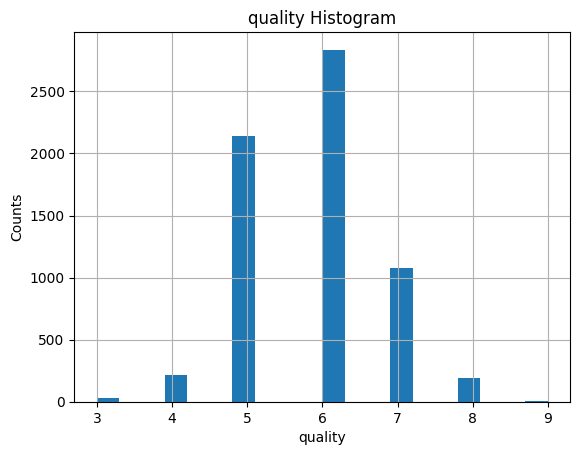

In [203]:
df = pd.read_csv('wine-full.csv')
df.describe()
df['quality'].hist(bins=20)
plt.title('quality Histogram')
plt.xlabel('quality')
plt.ylabel('Counts')
plt.show()


# 2.
Since white and red wines are not balanced, density=True was used to normalize their count in the histogram plot. The plot shows that red wine dominates for scores <=6, while white for scores > 6. So based on the data given, it can be concluded that most white wines have better quality than red wines.

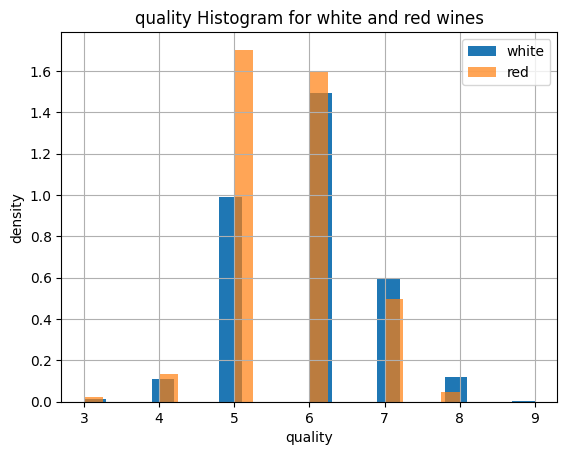

In [204]:
whiteMask = (df['type']=='white')
redMask = (df['type']=='red')


df[whiteMask]['quality'].hist(bins=20, density=True)

df[redMask]['quality'].hist(bins=20,alpha=0.7,density=True)
plt.title('quality Histogram for white and red wines')
plt.xlabel('quality')
plt.ylabel('density')
plt.legend(['white','red'])
plt.show()



# 3.
Once again density=True was used since dry and sweet wines are not balaned. Based on the quality histograms here though, there is no clear evidence that either dry or sweet wine has overall a better quality, but the dry wine shows a small advantage for quality score = 7. 

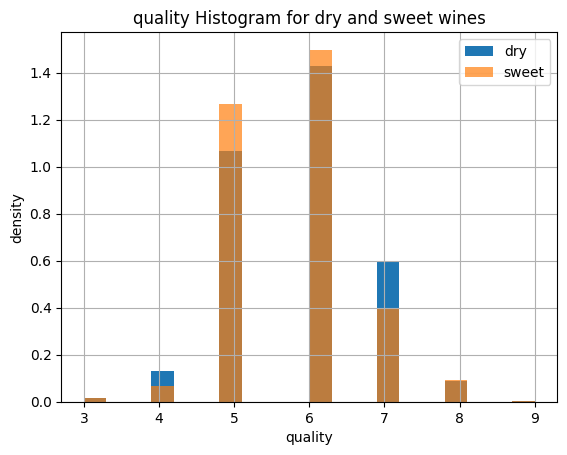

In [205]:
dryMask = (df['residual sugar']<=4)
sweetMask = (df['residual sugar']>10)


df[dryMask]['quality'].hist(bins=20, density=True)

df[sweetMask]['quality'].hist(bins=20,alpha=0.7,density=True)
plt.title('quality Histogram for dry and sweet wines')
plt.xlabel('quality')
plt.ylabel('density')
plt.legend(['dry','sweet'])
plt.show()



# 4.
In this step, the dataframe is split and loaded into numpy arrays, so that x has all features except quality and y only has the feature quality. Also, the data is split to train and test sets with 90% of samples in train and 10% of samples in test set.

In [206]:
for i in df.index:
    if df.loc[i,'type'] == 'white':
        df.loc[i,'type'] = 0
    elif df.loc[i,'type'] == 'red':
        df.loc[i,'type'] = 1
input_df = df.drop(columns=['quality'])
targets_df = df['quality']
x = input_df.to_numpy()
y = targets_df.to_numpy().astype(int)

seed = 0
test_size = 0.1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

# 5.
A decision tree regressor model is trained on the train set with random_state=0 and tested afterwards on the test set. The mean absolute error calculated (with default parameters) was 0.44.

In [207]:
tr = DecisionTreeRegressor(random_state=0)
tr.fit(x_train,y_train)
y_pred = tr.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mae in test set is:",mae)

Mae in test set is: 0.44769230769230767


# 6.
To check if the result is consistent with different train and test sets (samples and frequency of quality in train and test), step 4 and 5 are repeated for 10 seeds. Afterwards the mean value and the standard deviation of MAE is calculated. Using those 2 metrics, a confidence interval can be calculated (in this case that mae is = 0.466 +- 0.02).

In [208]:
mae_list = []
for seed in range(10):
    test_size = 0.1
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
    tr = DecisionTreeRegressor(random_state=0)
    tr.fit(x_train,y_train)
    y_pred = tr.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_list.append(mae)
print("Mean value of mae of different seeds:",np.average(mae_list))
print("STD of mae of different seeds",np.std(mae_list))

    

Mean value of mae of different seeds: 0.4661538461538462
STD of mae of different seeds 0.026832815729997475


# 7.
In this step, a validaiton split is also created so the final dataset is split so that 70% of samples are in train, 20% are in validation and 10% in the test set.
Afterwards, to fine tune a decision tree regressor, 15 different combinations of parameters are tested and their MAE is printed for the validation and train set.

In [209]:
seed = 0
valid_size = 0.2
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=valid_size, random_state=seed)


criterions = ['squared_error', 'friedman_mse']
max_depths = [None, 3, 5]
max_features = [None, 'sqrt', 'log2']
# 3*3*2 = 18...we need 15
numOfTreesTrained = 0
for cr in criterions:
    for md in max_depths:
        for mf in max_features:
            tr = DecisionTreeRegressor(random_state=0,criterion=cr,max_depth=md,max_features=mf)
            tr.fit(x_train,y_train)
            numOfTreesTrained +=1
           
            y_pred = tr.predict(x_valid)
            mae = mean_absolute_error(y_valid, y_pred)
            print('Criterion:',cr ,'Max depth:', md ,'max features:', mf, 'MAE in validation:', mae)
            y_pred_train = tr.predict(x_train)
            mae = mean_absolute_error(y_train, y_pred_train)
            print('Criterion:',cr ,'Max depth:', md ,'max features:', mf, 'MAE in train:', mae)
            if(numOfTreesTrained==15):
                break
        if(numOfTreesTrained==15):
            break
    if(numOfTreesTrained==15):
        break


Criterion: squared_error Max depth: None max features: None MAE in validation: 0.5068376068376068
Criterion: squared_error Max depth: None max features: None MAE in train: 0.00021381227282446012
Criterion: squared_error Max depth: None max features: sqrt MAE in validation: 0.5196581196581197
Criterion: squared_error Max depth: None max features: sqrt MAE in train: 0.0
Criterion: squared_error Max depth: None max features: log2 MAE in validation: 0.5196581196581197
Criterion: squared_error Max depth: None max features: log2 MAE in train: 0.0
Criterion: squared_error Max depth: 3 max features: None MAE in validation: 0.6094612699774777
Criterion: squared_error Max depth: 3 max features: None MAE in train: 0.584908441920622
Criterion: squared_error Max depth: 3 max features: sqrt MAE in validation: 0.6494153672059947
Criterion: squared_error Max depth: 3 max features: sqrt MAE in train: 0.6521140931755806
Criterion: squared_error Max depth: 3 max features: log2 MAE in validation: 0.649415

# 8.
The validation set is always the one used to select the best parameters for a model. The reason is that the MAE in train doesnt mean much since a model that overfits and cant generalize will have 0 MAE. But by using a different set that is not being used in fitting (training), each model can be evaluated on "unknown" samples and the generalizing ability can be estimated.

# 9.
Here, 15 different combinations of parameters are tested once again, but this time only by using the starting train and test sets (90%/10%). This is done by implementing k-cross-validation with k=10.
This means that train set is split into 10 different train and validation sets and a mean MAE of those 10 train/valid sets is calculated as a result for each combination.

In [210]:
seed = 0
test_size = 0.1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
criterions = ['squared_error', 'friedman_mse']
max_depths = [None, 3, 5]
max_features = [None, 'sqrt', 'log2']

parameters = []
count = 0
for md in max_depths:
    for cr in criterions:
        for mf in max_features:
            parameters.append({'max_depth': [md], 'criterion': [cr], 'max_features': [mf]})
            count += 1
            if count == 15:
                break
        if count == 15:
            break
    if count == 15:
        break
tr = DecisionTreeRegressor(random_state=0)
cv= GridSearchCV(tr, parameters, cv=10, scoring='neg_mean_absolute_error',n_jobs=-1)
cv.fit(x_train, y_train)
#print(sorted(cv.cv_results_.keys()))
for i in range(len(cv.cv_results_['params'])):
    mae = -cv.cv_results_['mean_test_score'][i]  
    param = cv.cv_results_['params'][i]
    print("MAE:", mae, "Params:", param)



MAE: 0.4882879639386489 Params: {'criterion': 'squared_error', 'max_depth': None, 'max_features': None}
MAE: 0.4901677204074465 Params: {'criterion': 'squared_error', 'max_depth': None, 'max_features': 'sqrt'}
MAE: 0.4901677204074465 Params: {'criterion': 'squared_error', 'max_depth': None, 'max_features': 'log2'}
MAE: 0.4870872848612575 Params: {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': None}
MAE: 0.49769377122116853 Params: {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': 'sqrt'}
MAE: 0.49769377122116853 Params: {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': 'log2'}
MAE: 0.5941212295664321 Params: {'criterion': 'squared_error', 'max_depth': 3, 'max_features': None}
MAE: 0.6482703753420582 Params: {'criterion': 'squared_error', 'max_depth': 3, 'max_features': 'sqrt'}
MAE: 0.6482703753420582 Params: {'criterion': 'squared_error', 'max_depth': 3, 'max_features': 'log2'}
MAE: 0.5941212295664321 Params: {'criterion': 'friedman_mse', 

# 10.
The best parameters from step 9 were criterion = squared_error, max_depth = None and , max_features = None. The MAE on the test set was 0.44. <br/>
Out of the steps 6, 7 and 9, the methodology followed in step 9 is the most robust. In step 6, models with different seeds where trained and tested to get the average MAE but doesnt help at fine tuning at all. In step 7, fine tuning is possible by getting the best performing model in validation set MAE but splitting a set to train/validation and test is not always possible and requires a lot of samples. Step 9 allows for evaluation in validation without losing samples from train or split sets.

In [211]:
tr = DecisionTreeRegressor(criterion= 'squared_error', max_depth= None, max_features= None, random_state=0)
tr.fit(x_train,y_train)
y_pred = tr.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print('MAE in test:', mae)


MAE in test: 0.44769230769230767


# 11.
Finally, step 9 is repeated but with max_depth this time always set to =5. The best tree found had criterion = squared_error, max_depth = 5 and max_features = None as parameters and was plotted using plot_tree from sklearn.
By looking at the plot the following rules can be derived: <br/>
If alcohol <= 10.65 the quality is considered to be slightly worse and volatile acidity is checked. If that is <=0.23 the quality is considered to be much better. If its > 0.23 the quality is considered to be slightly worse again. If alcohol > 10.65 the quality is considered to be much better, then again if the alcohol is <= 11.74 the quality once again worsens and the volatile acidity is checked once again if its <=0.445. If so, the quality is considered to be better by a bit otherwise worse by a bit. If alcohol > 11.74 the quality is considered to be better by a bit. The rules go on as the depth gets greater but nodes grow by the power of 2. Afterall, an importance plot is printed and it shows that the most important feature to determine the quality of a wine is alcohol, followed by volatile acidity, sulphates, free sulphur dioxide, chlorides, density, citric acid, residual sugar, fixed acidity, pH, total sulfur dioxide and finally type being the least important feature in predicting quality.

MAE: 0.5668091119767175 Params: {'criterion': 'squared_error', 'max_depth': 5, 'max_features': None}
MAE: 0.6048411342621403 Params: {'criterion': 'squared_error', 'max_depth': 5, 'max_features': 'sqrt'}
MAE: 0.6048411342621403 Params: {'criterion': 'squared_error', 'max_depth': 5, 'max_features': 'log2'}
MAE: 0.5668091119767175 Params: {'criterion': 'friedman_mse', 'max_depth': 5, 'max_features': None}
MAE: 0.6048411342621403 Params: {'criterion': 'friedman_mse', 'max_depth': 5, 'max_features': 'sqrt'}
MAE: 0.6048411342621403 Params: {'criterion': 'friedman_mse', 'max_depth': 5, 'max_features': 'log2'}
MAE: 0.5650729638226685 Params: {'criterion': 'poisson', 'max_depth': 5, 'max_features': None}
MAE: 0.6039208677722916 Params: {'criterion': 'poisson', 'max_depth': 5, 'max_features': 'sqrt'}
MAE: 0.6039208677722916 Params: {'criterion': 'poisson', 'max_depth': 5, 'max_features': 'log2'}


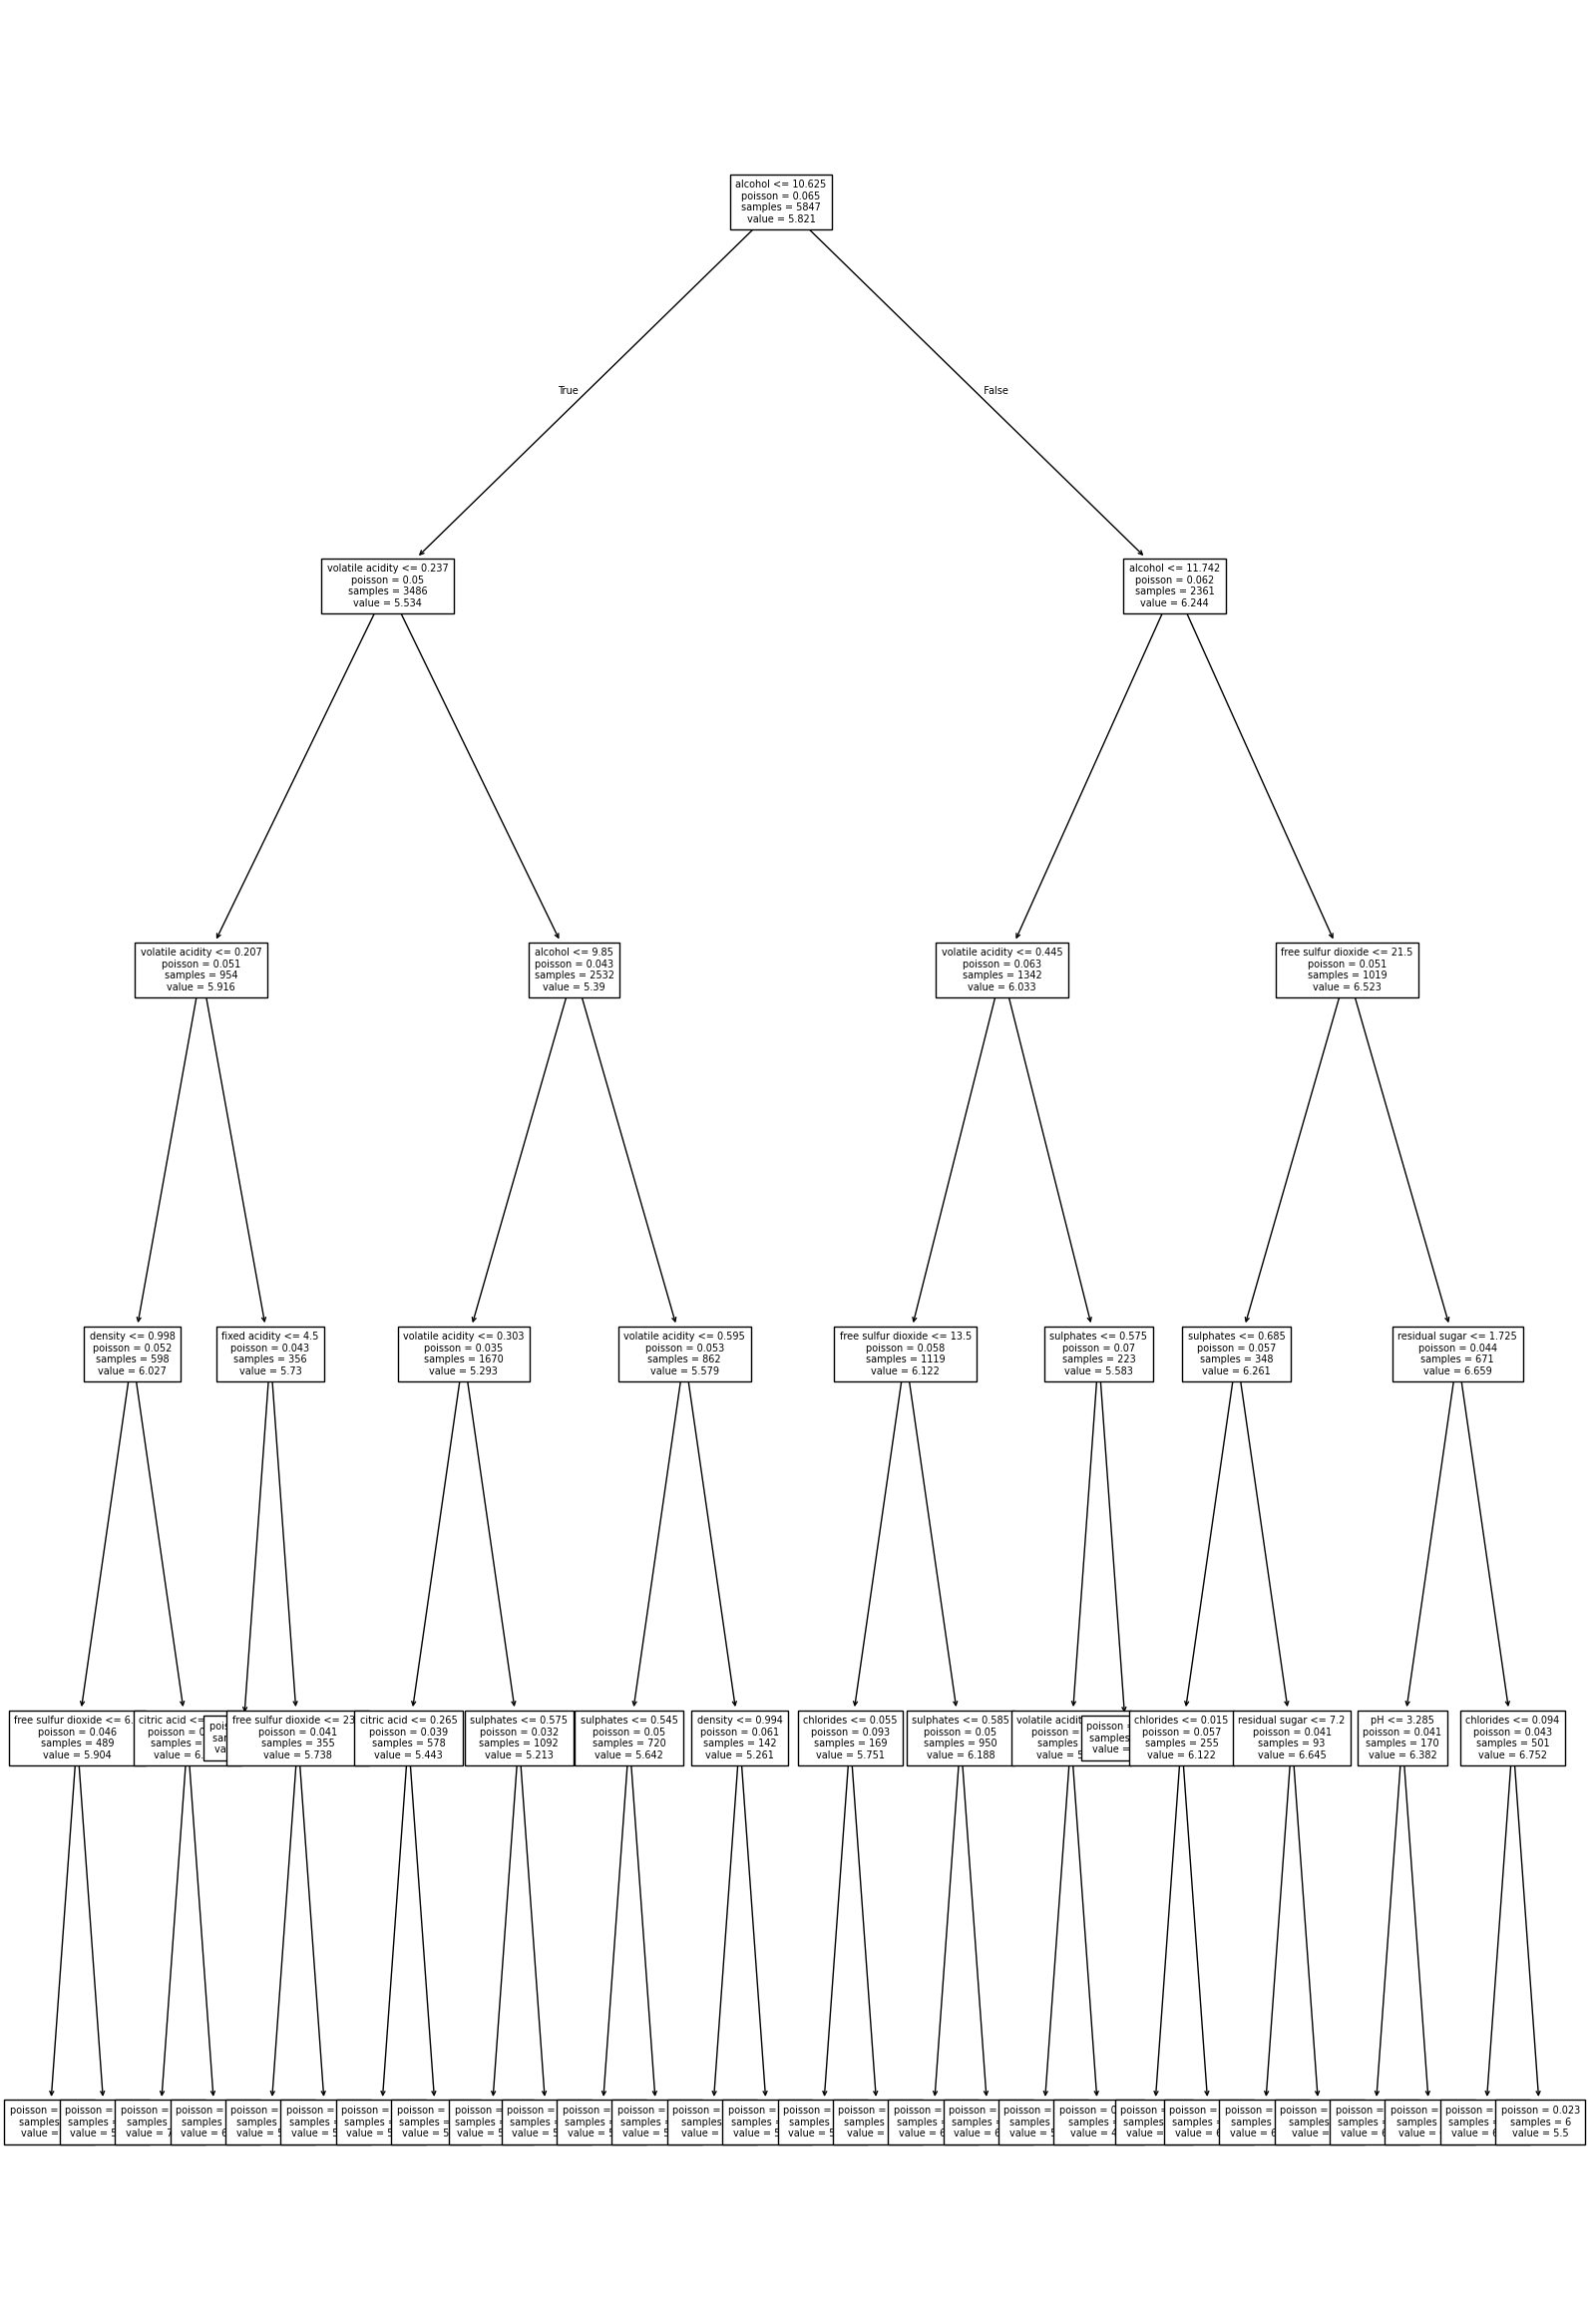

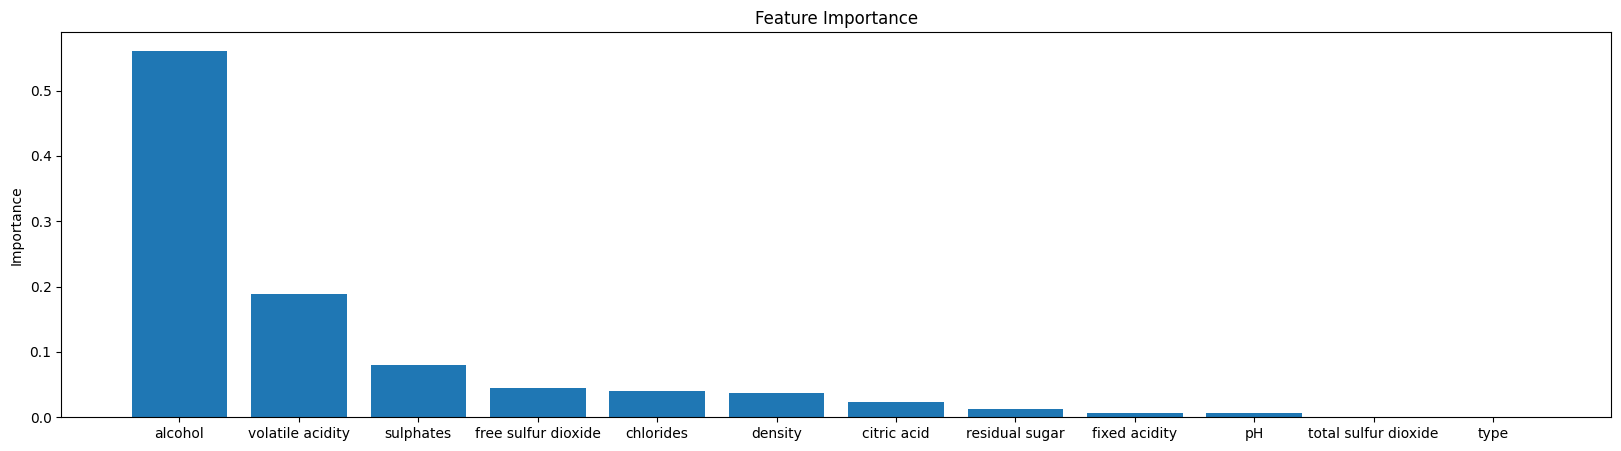

In [212]:

criterions = ['squared_error', 'friedman_mse',  "poisson"]
max_depths = [5]
max_features = [None, 'sqrt', 'log2']

parameters = []
count = 0
for md in max_depths:
    for cr in criterions:
        for mf in max_features:
            parameters.append({'max_depth': [md], 'criterion': [cr], 'max_features': [mf]})
            count += 1
            if count == 15:
                break
        if count == 15:
            break
    if count == 15:
        break

tr = DecisionTreeRegressor(random_state=0)
cv= GridSearchCV(tr, parameters, cv=10, scoring='neg_mean_absolute_error',n_jobs=-1)
cv.fit(x_train, y_train)

#print(sorted(cv.cv_results_.keys()))
for i in range(len(cv.cv_results_['params'])):
    mae = -cv.cv_results_['mean_test_score'][i]  
    param = cv.cv_results_['params'][i]
    print("MAE:", mae, "Params:", param)

best_params = cv.best_params_

best_tree = DecisionTreeRegressor(random_state=0,**best_params)
best_tree.fit(x_train, y_train)
plt.figure(figsize=(20,30))
plot_tree(best_tree, feature_names=input_df.columns,fontsize=7)
plt.show()



feature_names = list(input_df.columns)
importances = best_tree.feature_importances_
indicesForSorting = np.argsort(importances)[::-1]
sorted_features = []
sorted_importances = []



for i in indicesForSorting:
    sorted_features.append(feature_names[i])
    sorted_importances.append(importances[i])

plt.figure(figsize=(20,5))
plt.bar(sorted_features, sorted_importances)

plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()